In [27]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageEnhance

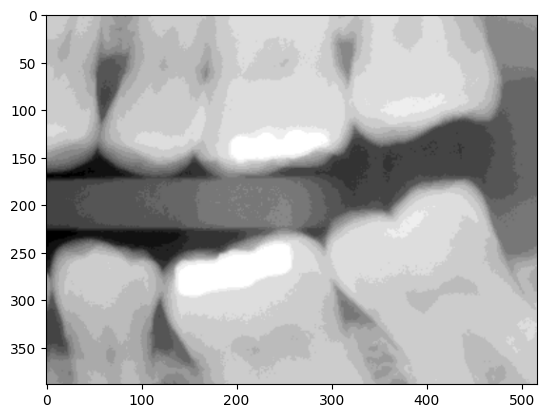

In [3]:
img = cv2.imread("/kaggle/input/dari-we/Image_Q1.PNG")
plt.imshow(img)

In [4]:
def color_change(img):
    a = np.empty((img.shape[0],img.shape[1]),dtype=np.uint8)
    if img.shape[2] == 1:
        print("This image is Already In GrayScale Format.")
        return
    else:
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                    a[i][j] = int(0.299 * img[i][j][0]  + 0.587 * img[i][j][1] + 0.11 * img[i][j][2])
        plt.imshow(a,cmap='gray')
        cv2.imwrite("colored-to-grayscale.png",a)
        return a

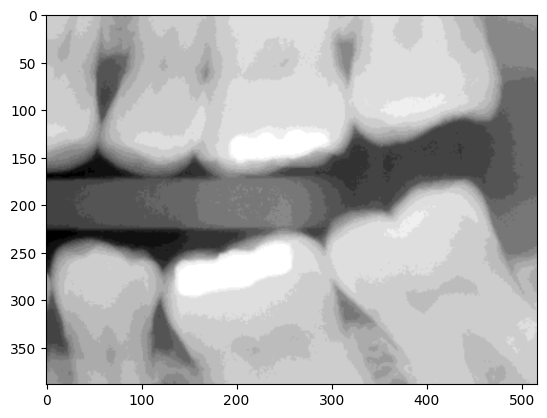

In [6]:
gray_image = color_change(img)

In [7]:
teeth_mask = (gray_image > 127).astype('uint8') * 255

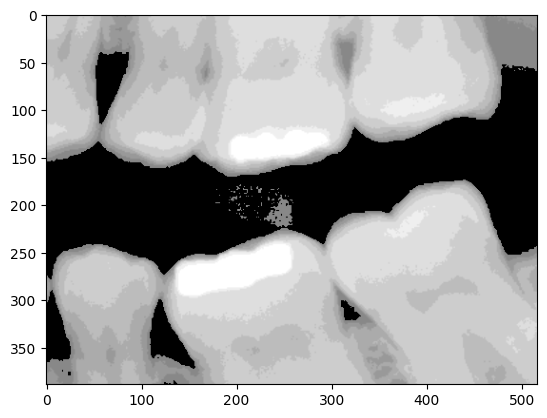

In [10]:
result = gray_image.copy()
result[teeth_mask == 0] = 0
plt.imshow(result, cmap='gray')

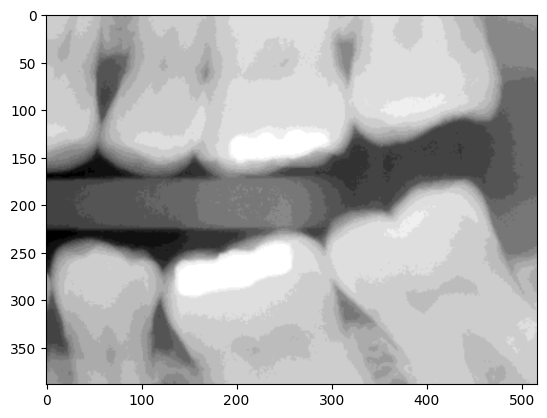

In [39]:
# Load the image and convert to grayscale
original_image = cv2.imread('/kaggle/input/dari-we/Image_Q1.PNG')
gray_image = color_change(original_image)


In [40]:


filtered_image = cv2.bilateralFilter(gray_image, d=9, sigmaColor=75, sigmaSpace=75)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced_image = clahe.apply(filtered_image)


In [41]:


_, affected_mask = cv2.threshold(enhanced_image, 240, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
refined_mask = cv2.morphologyEx(affected_mask, cv2.MORPH_CLOSE, kernel)


In [42]:

highlighted_image = original_image.copy()
highlighted_image[refined_mask == 255] = [255, 0, 0]  # BGR for red color


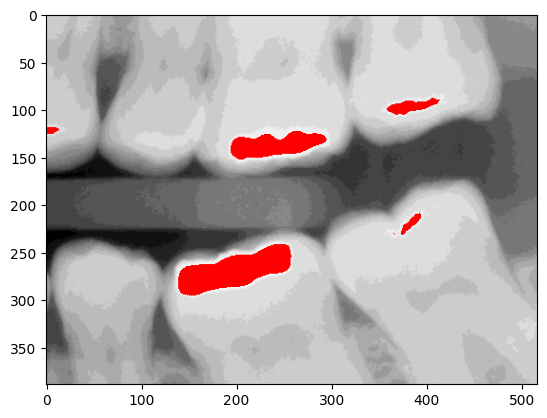

In [43]:

# Display the result
plt.imshow(highlighted_image,cmap='gray')  # Image with Affected Regions in Red


# Q2

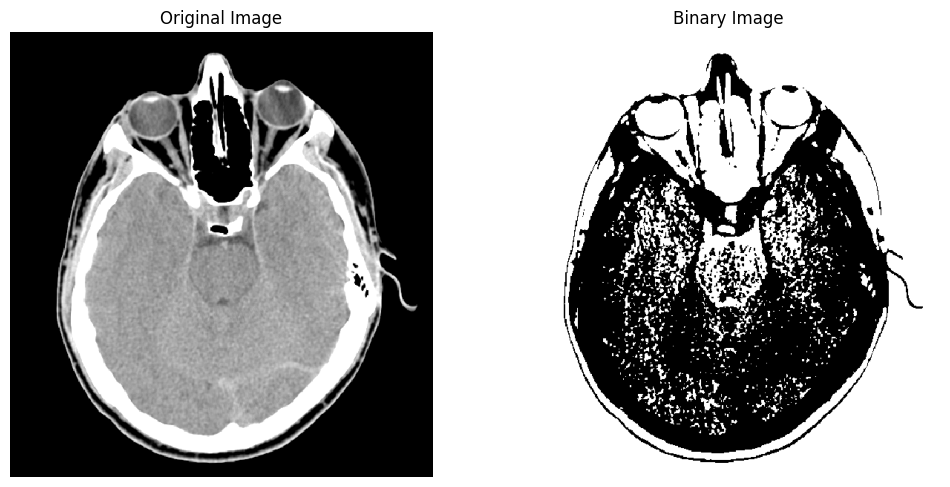

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the original image
image_path = '/kaggle/input/dari-we/Image_Q2.tif'
original_image = Image.open(image_path)

# Convert the image to grayscale
gray_image = original_image.convert('L')

# Define the intensity threshold for intensity slicing
threshold = 150

# Apply intensity slicing to create a binary image
binary_image = np.array(gray_image) > threshold

# Display the original and binary images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(binary_image, cmap='binary')
axes[1].set_title('Binary Image')
axes[1].axis('off')
plt.show()


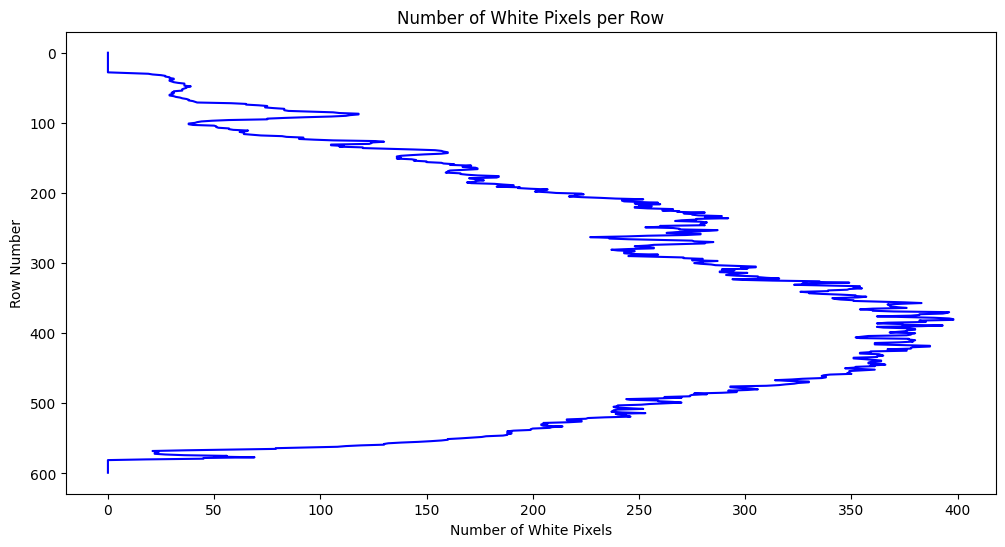

In [47]:

# Count the number of white pixels in each row and plot the data
white_pixels_per_row = np.sum(binary_image, axis=1)
plt.figure(figsize=(12, 6))
plt.plot(white_pixels_per_row, range(len(white_pixels_per_row)), color='blue')
plt.title('Number of White Pixels per Row')
plt.xlabel('Number of White Pixels')
plt.ylabel('Row Number')
plt.gca().invert_yaxis()
plt.show()



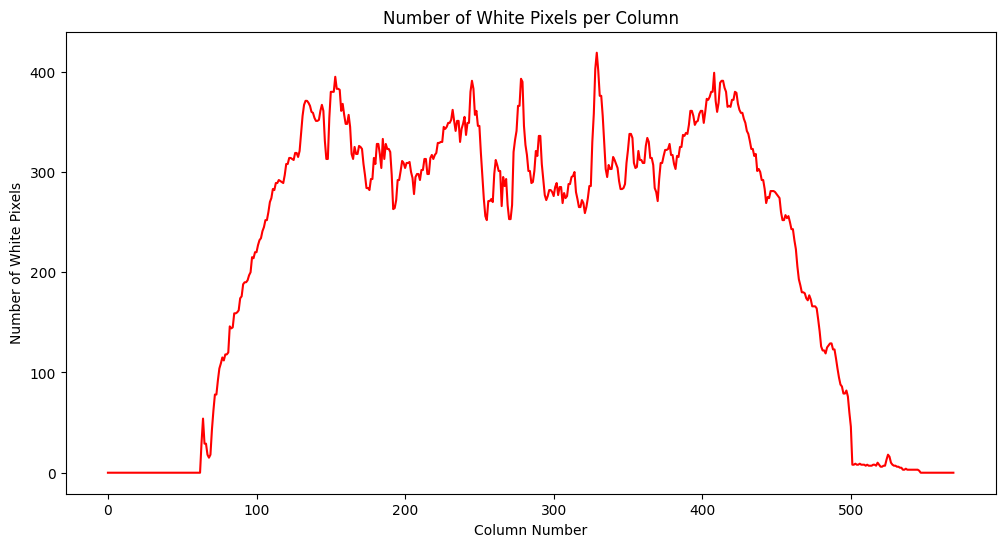

In [48]:

# Count the number of white pixels in each column and plot the data
white_pixels_per_column = np.sum(binary_image, axis=0)
plt.figure(figsize=(12, 6))
plt.plot(range(len(white_pixels_per_column)), white_pixels_per_column, color='red')
plt.title('Number of White Pixels per Column')
plt.xlabel('Column Number')
plt.ylabel('Number of White Pixels')
plt.show()

# Q3

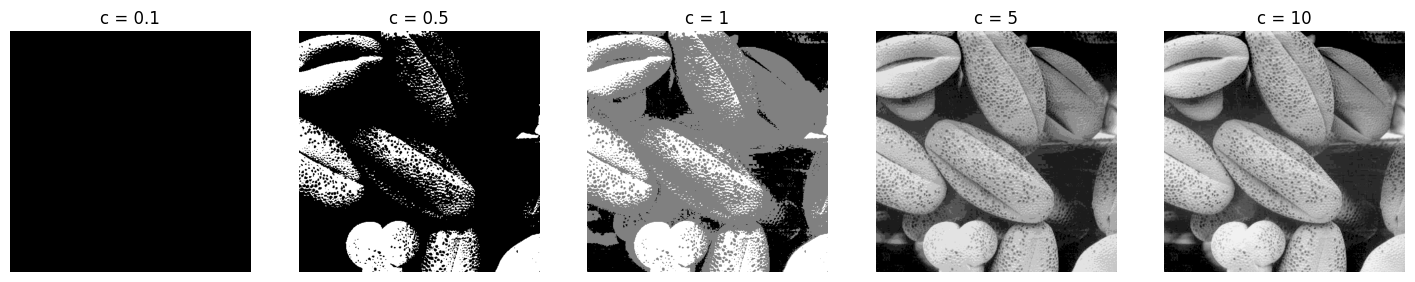

In [49]:
# Load the original image
image_path = '/kaggle/input/dari-we/Image_Q3.tif'
original_image = Image.open(image_path)

# Convert the image to grayscale
gray_image = original_image.convert('L')

# Define a range of values for 'c'
c_values = [0.1, 0.5, 1, 5, 10]

# Apply different log transformations and display the results
fig, axes = plt.subplots(1, len(c_values), figsize=(18, 6))

for i, c in enumerate(c_values):
    transformed_image = c * np.log(1 + np.array(gray_image))
    transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)
    axes[i].imshow(transformed_image, cmap='gray')
    axes[i].set_title(f'c = {c}')
    axes[i].axis('off')

plt.show()


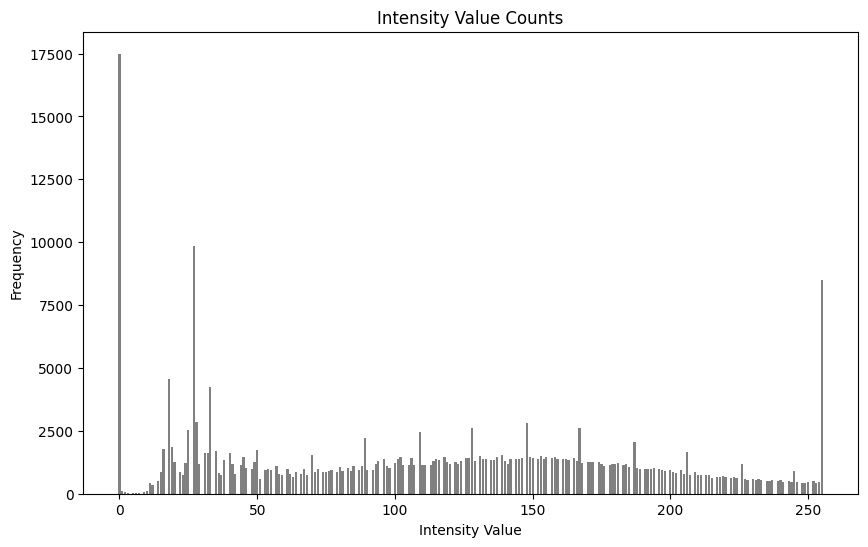

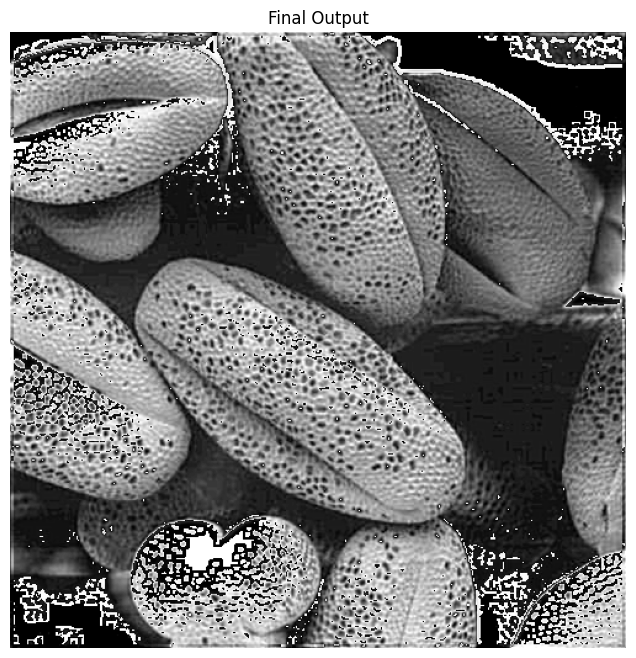

In [50]:
def count_intensity_values(image):
    intensity_counts = {}
    for row in image:
        for pixel in row:
            intensity = pixel
            if intensity in intensity_counts:
                intensity_counts[intensity] += 1
            else:
                intensity_counts[intensity] = 1
    return intensity_counts

def custom_box_filter(image, size):
    height, width = image.shape
    filtered_image = np.zeros((height, width), dtype=np.uint8)
    margin = size // 2

    for i in range(margin, height - margin):
        for j in range(margin, width - margin):
            neighborhood = image[i - margin:i + margin + 1, j - margin:j + margin + 1]
            filtered_pixel = np.mean(neighborhood)
            filtered_image[i, j] = filtered_pixel

    return filtered_image

# Load the original image
image_path = '/kaggle/input/dari-we/Image_Q4.tif'
original_image = Image.open(image_path).convert('L')
original_image_array = np.array(original_image)

# Task 1: Count intensity values
intensity_counts = count_intensity_values(original_image_array)

# Plot intensity values
plt.figure(figsize=(10, 6))
plt.bar(intensity_counts.keys(), intensity_counts.values(), color='gray')
plt.title('Intensity Value Counts')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

# Task 2: Apply custom box filters
filtered_image_7x7 = custom_box_filter(original_image_array, size=7)
filtered_image_3x3 = custom_box_filter(original_image_array, size=3)

# Task 3: Compute final output
final_output = original_image_array - np.abs(filtered_image_7x7 - filtered_image_3x3)

# Task 4: Display resulting image
plt.figure(figsize=(8, 8))
plt.imshow(final_output, cmap='gray')
plt.title('Final Output')
plt.axis('off')
plt.show()


# Q5

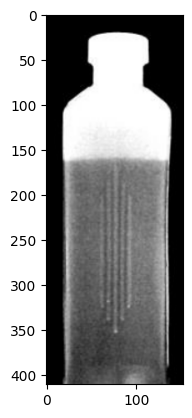

In [60]:
# Load the image
image_path = '/kaggle/input/dari-we/Image_Q5_1.PNG'
image = Image.open(image_path)

# Display the image
plt.imshow(image)
image_path = '/kaggle/input/dari-we/Image_Q5_2.PNG'
image = Image.open(image_path)
#plt.imshow('/kaggle/input/dari-we/Image_Q5_2.PNG')

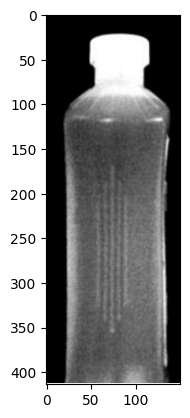

In [59]:
plt.imshow(image)

In [53]:
def calculate_fill_level(image_path, bottle_top, bottle_bottom, syrup_threshold):
    # Load the image in grayscale mode
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded
    if image is None:
        print("Image not found. Please check the file path.")
        return None

    # Crop the image to exclude everything above the bottle top and below the bottle bottom
    cropped_image = image[bottle_top:bottle_bottom, :]

    # Apply a threshold to segment the syrup using the provided syrup_threshold
    _, syrup_mask = cv2.threshold(cropped_image, syrup_threshold, 255, cv2.THRESH_BINARY_INV)

    # Calculate the fill level based on the segmented syrup area
    syrup_area = np.sum(syrup_mask == 255)
    bottle_area = (bottle_bottom - bottle_top) * cropped_image.shape[1]
    fill_level = (syrup_area / bottle_area) * 100  # Fill level as a percentage of the total area

    # Display results
    print(f"Filled Percentage: {fill_level:.2f}%")
    return fill_level

# Using a uniform syrup_threshold for both bottles
syrup_threshold = 180

# Calculate fill levels for both bottles with updated parameters
fill_level_1 = calculate_fill_level('/kaggle/input/dari-we/Image_Q5_1.PNG', 36, 417, syrup_threshold)
fill_level_2 = calculate_fill_level('/kaggle/input/dari-we/Image_Q5_2.PNG', 0, 410, syrup_threshold)

# Assuming the threshold for properly filled is 80%
fill_threshold = 80
message_1 = "Bottle is properly filled." if fill_level_1 >= fill_threshold else "Bottle is not properly filled."
message_2 = "Bottle is properly filled." if fill_level_2 >= fill_threshold else "Bottle is not properly filled."

print(message_1)
print(message_2)


Filled Percentage: 77.49%
Filled Percentage: 91.68%
Bottle is not properly filled.
Bottle is properly filled.
